In [1]:
from qiskit import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmqx2')

In [ ]:
#initialize 
U = 4
V = 0.745356

**From the paper**, the optimal values of $\theta$ for the $\vert00\rangle$ in Fig.2b are:
$$\theta_0=1.5708 \\
\theta_1=-2.16167 \\
\theta_2=0$$
Want to calculate $\langle H \rangle = \frac{U}{4}\langle \sigma^0_z \sigma^1_z \rangle + V(\langle \sigma^0_x \rangle + \langle\sigma^1_x\rangle)$.


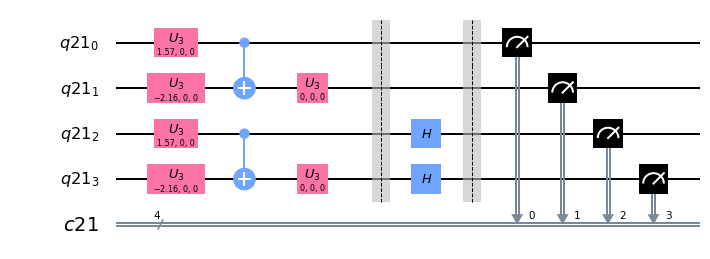

In [37]:
theta_b = [1.5708, -2.16167, 0]
q_b = QuantumRegister(4)
c_b = ClassicalRegister(4)
circuit_b = QuantumCircuit(q_b, c_b)

circuit_b.u3(theta_b[0],0,0,[q_b[0],q_b[2]])
circuit_b.u3(theta_b[1],0,0,[q_b[1], q_b[3]])
circuit_b.cx(q_b[0],q_b[1])
circuit_b.cx(q_b[2],q_b[3])
circuit_b.u3(theta_b[2],0,0,[q_b[1],q_b[3]])
circuit_b.barrier()
circuit_b.h([q_b[2],q_b[3]])
circuit_b.barrier()
circuit_b.measure(q_b, c_b)
circuit_b.draw(output='mpl')

In [38]:
job = execute(circuit_b, backend=backend, shots=8192)

results_b = job.result()
times_b = job.time_per_step()
qobj_b = job.qobj()

<ipython-input-38-4de4e223fe83>:4: UserWarning: The time per step date and time information is returned in local time now, rather than UTC.
  times_b = job.time_per_step()


The optimal value of $\theta$ for Fig.2c is $\theta_0=-2.50107$, giving $E_0 = -1.24722$.

We want to calculate $\langle H \rangle = \frac{U}{4}\langle\sigma_z\rangle + V\langle\sigma_x\rangle$

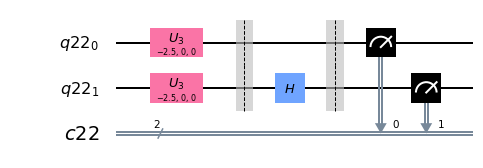

In [39]:
theta_c = -2.50107
q_c = QuantumRegister(2)
c_c = ClassicalRegister(2)
circuit_c = QuantumCircuit(q_c,c_c)
circuit_c.u3(theta_c,0,0,q_c)
circuit_c.barrier()
circuit_c.h(q_c[1]) #rotate axes
circuit_c.barrier()
circuit_c.measure(q_c,c_c)
circuit_c.draw(output='mpl')


In [40]:
job = execute(circuit_c, backend=backend, shots=4096)

results_c = job.result()
times_c = job.time_per_step()
qobj_c = job.qobj()

<ipython-input-40-1e5fb6f41ece>:4: UserWarning: The time per step date and time information is returned in local time now, rather than UTC.
  times_c = job.time_per_step()


In [1]:
results_c.get_counts()

NameError: name 'results_c' is not defined

In [ ]:
term1 = (results['0'] - results['1'])/4096

